In [17]:
### loading libraries
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from keras.preprocessing.image import ImageDataGenerator
from keras.utils import np_utils
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
import os
from keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

Matplotlib created a temporary config/cache directory at /scratch/local/u6031121/12953803/matplotlib-b489c__9 because the default path (/home/jovyan/.cache/matplotlib) is not a writable directory; it is highly recommended to set the MPLCONFIGDIR environment variable to a writable directory, in particular to speed up the import of Matplotlib and to better support multiprocessing.


In [2]:
# Check available devices
devices = tf.config.list_physical_devices('GPU')

if len(devices) > 0:
    print("GPU is available")
    for device in devices:
        print("Device name:", device.name)
else:
    print("No GPU is available")

GPU is available
Device name: /physical_device:GPU:0


## Training data

In [3]:
############################ TRAINING DATA 
# changing directory to the data folder
%cd /uufs/chpc.utah.edu/common/home/gompert-group4/projects/fluctCNN/DatafromUpdataCodeAugust25th/Trn/

directory_path ='/uufs/chpc.utah.edu/common/home/gompert-group4/projects/fluctCNN/DatafromUpdataCodeAugust25th/Trn/'
### making a list of all csv files
csv_files = [file for file in os.listdir(directory_path) if file.endswith('.csv')]

### processing the list of csv files to make arrays of input matrices and extracting output labels 
matrices = []
out_vec = []
for file in csv_files:
    df = pd.read_csv(file, header=None, sep=' ', dtype='float32')
    matrices.append(df)
    # appending first five letters to out_vec as labels
    label = file[0:8]
    out_vec.append(label)
input_arrays = np.stack(matrices)
inDa_trn = input_arrays.reshape((45000, 10, 20, 1))
inDa_trn.shape

/uufs/chpc.utah.edu/common/home/gompert-group4/projects/fluctCNN/DatafromUpdataCodeAugust25th/Trn


(45000, 10, 20, 1)

In [4]:
######### TRAINIG labels
labels =out_vec
# converting string values to integer calsses
from sklearn.preprocessing import LabelEncoder
# Initialize a LabelEncoder object
label_encoder = LabelEncoder()
# Fit the LabelEncoder to your string list and transform the string values into integer classes
label_int = label_encoder.fit_transform(labels)
#from keras.utils import to_categorical
from tensorflow.keras.utils import to_categorical
ouLa_trn =to_categorical(label_int)
ouLa_trn.shape
#print(ouLa_trn)
ouLa_trn.shape

(45000, 3)

## Test data

In [5]:
############################ TEST DATA 
# changing directory to the data folder
%cd /uufs/chpc.utah.edu/common/home/gompert-group4/projects/fluctCNN/DatafromUpdataCodeAugust25th/Tst/
# importing test set
directory_path ='/uufs/chpc.utah.edu/common/home/gompert-group4/projects/fluctCNN/DatafromUpdataCodeAugust25th/Tst/'
### making a list of all csv files
csv_files_t = [file for file in os.listdir(directory_path) if file.endswith('.csv')]

### processing the list of csv files to make arrays of input matrices and extracting output labels 
matrices = []
out_vec = []
for file in csv_files_t:
    df = pd.read_csv(file, header=None, sep=' ', dtype='float32')
    matrices.append(df)
    # appending first five letters to out_vec as labels
    label = file[0:8]
    out_vec.append(label)
input_arrays = np.stack(matrices)
inDa_tst = input_arrays.reshape((15000, 10, 20, 1))
inDa_tst.dtype
inDa_tst.shape

/uufs/chpc.utah.edu/common/home/gompert-group4/projects/fluctCNN/DatafromUpdataCodeAugust25th/Tst


(15000, 10, 20, 1)

In [6]:
######### TEST labels
labels =out_vec
# converting string values to integer calsses
from sklearn.preprocessing import LabelEncoder
# Initialize a LabelEncoder object
label_encoder = LabelEncoder()
# Fit the LabelEncoder to your string list and transform the string values into integer classes
label_int = label_encoder.fit_transform(labels)
#from keras.utils import to_categorical
from tensorflow.keras.utils import to_categorical
ouLa_tst =to_categorical(label_int)
ouLa_tst.shape

(15000, 3)

## Validation data

#### Independent validation set generated afresh from the simulation script

In [7]:
############################ VALIDATION DATA 
# changing directory to the data folder
%cd /uufs/chpc.utah.edu/common/home/gompert-group4/projects/fluctCNN/DatafromUpdataCodeAugust25th/val/
# importing validation set
directory_path ='/uufs/chpc.utah.edu/common/home/gompert-group4/projects/fluctCNN/DatafromUpdataCodeAugust25th/val/'
### making a list of all csv files
csv_files_v = [file for file in os.listdir(directory_path) if file.endswith('.csv')]
#print(len(csv_files))
### processing the list of csv files to make arrays of input matrices and extracting output labels 
matrices = []
out_vec = []
for file in csv_files_v:
    df = pd.read_csv(file, header=None, sep=' ', dtype='float32')
    matrices.append(df)
    # appending first five letters to out_vec as labels
    label = file[:8]
    out_vec.append(label)
input_arrays = np.stack(matrices, axis=0)
inDa_val = input_arrays.reshape((3000, 10, 20, 1))
inDa_val.dtype
inDa_val.shape

/uufs/chpc.utah.edu/common/home/gompert-group4/projects/fluctCNN/DatafromUpdataCodeAugust25th/val


(3000, 10, 20, 1)

In [8]:
######### VALIDATION labels
labels =out_vec
# converting string values to integer calsses
from sklearn.preprocessing import LabelEncoder
# Initialize a LabelEncoder object
label_encoder = LabelEncoder()
# Fit the LabelEncoder to your string list and transform the string values into integer classes
label_int = label_encoder.fit_transform(labels)
#from keras.utils import to_categorical
from tensorflow.keras.utils import to_categorical
ouLa_val =to_categorical(label_int)
ouLa_val.shape

(3000, 3)

# CNN model

Epoch 1/35
469/469 [==============================] - 4s 7ms/step - loss: 1.0992 - accuracy: 0.3311 - val_loss: 1.0986 - val_accuracy: 0.3341
Epoch 2/35
469/469 [==============================] - 3s 6ms/step - loss: 1.0987 - accuracy: 0.3327 - val_loss: 1.0986 - val_accuracy: 0.3336
Epoch 3/35
469/469 [==============================] - 3s 6ms/step - loss: 1.0986 - accuracy: 0.3348 - val_loss: 1.0987 - val_accuracy: 0.3353
Epoch 4/35
469/469 [==============================] - 3s 6ms/step - loss: 1.0984 - accuracy: 0.3388 - val_loss: 1.0987 - val_accuracy: 0.3333
Epoch 5/35
469/469 [==============================] - 3s 6ms/step - loss: 1.0978 - accuracy: 0.3473 - val_loss: 1.0984 - val_accuracy: 0.3415
Epoch 6/35
469/469 [==============================] - 3s 6ms/step - loss: 1.0966 - accuracy: 0.3582 - val_loss: 1.0983 - val_accuracy: 0.3441
Epoch 7/35
469/469 [==============================] - 3s 6ms/step - loss: 1.0947 - accuracy: 0.3656 - val_loss: 1.1009 - val_accuracy: 0.3360
Epoch 

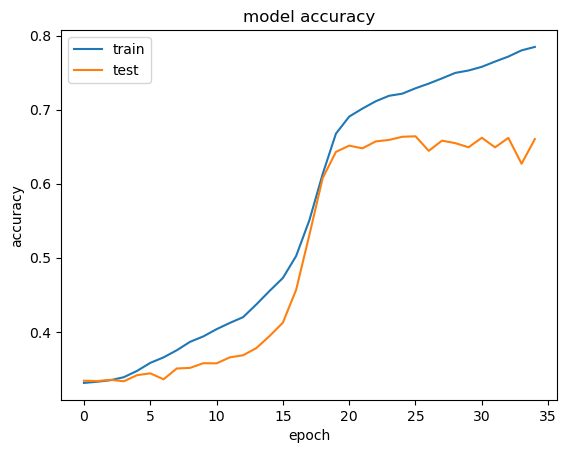

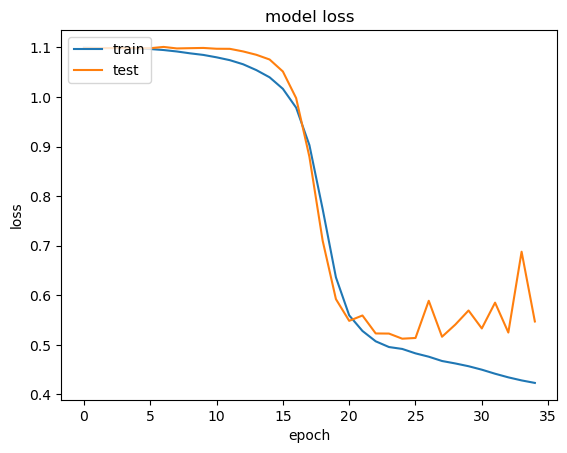

In [84]:
### CNN

model = keras.Sequential()
model.add(layers.Conv2D(64, kernel_size=(3, 3),padding = "same", activation="relu", input_shape=(10,20,1)))
model.add(layers.Conv2D(256, kernel_size=(3, 3), activation="relu"))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.Dropout(0.2))
model.add(layers.Flatten())
model.add(layers.Dense(256, activation="relu"))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(128, activation="relu"))
model.add(layers.Dropout(0.1))
model.add(layers.Dense(3, activation="softmax"))


optimizer = keras.optimizers.Adam(learning_rate=0.0001,
    beta_1=0.8,
    beta_2=0.88,
    #momentum=0.4,
    epsilon=1e-07,)

# Compile the model
model.compile(optimizer=optimizer, loss="categorical_crossentropy", metrics=["accuracy"])

# Train the model
es = EarlyStopping(monitor='val_accuracy', patience=10, verbose=1)
history = model.fit(inDa_trn, ouLa_trn, batch_size=96, epochs=35,validation_data=(inDa_tst, ouLa_tst), callbacks=[es] )
print(history.history.keys())

# Evaluate the model on the test set
loss, accuracy = model.evaluate(inDa_val, ouLa_val)
# print("Test Loss:", loss)
# print("Test Accuracy:", accuracy)

# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [85]:
# Making confusion matrix to find percentage of false positives an dfalse negatives
# use of test data to make predictions based on the model fitted
lable_predicted = model.predict(inDa_val)
lable_predicted_categories = np.argmax(lable_predicted, axis=1)
label_actual = np.argmax(ouLa_val, axis =1)

In [86]:
# calculaiton of confusion matrix\
cm = confusion_matrix(label_actual, lable_predicted_categories)
print(cm)
type(cm)


[[965  22  13]
 [  7 433 560]
 [ 11 419 570]]


numpy.ndarray

In [87]:
# iterating through numpy array to convert the values into percentage

oneD_total = np.sum(cm, axis =1)
cm_perc = cm/oneD_total[:,np.newaxis]
cm_perc

array([[0.965, 0.022, 0.013],
       [0.007, 0.433, 0.56 ],
       [0.011, 0.419, 0.57 ]])

In [88]:
class_names = [0,1,2] # the vector defines three classes of selection types

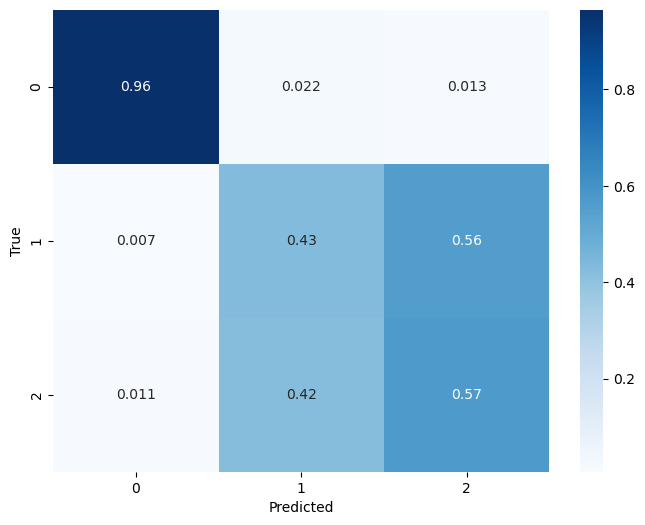

In [89]:
# graphical visualization of the confusion matrix in the form of heatmap
plt.figure(figsize=(8,6))
sns.heatmap(cm_perc,  annot=True, cmap ='Blues', xticklabels =  class_names, yticklabels = class_names)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

In [65]:
array_2d = np.array([[1, 2, 3],
                     [4, 5, 6],
                     [7, 8, 9]])

# Calculate the sum of each 1D array (row)
row_sums = np.sum(array_2d, axis=1)
row_sums

array([ 6, 15, 24])